# E. coli metabolic network

### Building graph

In [1]:
import modelo as m
import networkx as nx
import Bio.KEGG.REST as rkg
import Bio.KEGG.Enzyme as ex

eco = m.get_network("eco", opt='eco')

Retrieving data from KEGG PATHWAY database. Tue Mar 27 13:47:54 2018
Building graphs.


### Retrieving graph information

In [2]:
eco_nodes = list(eco.grafo.nodes())
eco_nodes.remove('undefined')
orf_queries = []
product_queries = []

for i in range(len(eco_nodes)):
    gene = rkg.kegg_get(eco_nodes[i])
    tmp = ex.read(gene)
    if eco_nodes[i].startswith("eco:"):
        orf_queries.append(tmp.name[0])
    elif tmp.name != []:
        product_queries.append(tmp.name)

### Building a gene dataset from The Profiling of Escherichia coli Chromosome (PEC) database

In [3]:
import pandas as pd

eco_data = pd.read_table('PECData.dat')
eco_data.rename(columns={'Class(1:essential 2:noessential 3:unknown)': 'Class',
                         'Alternative name': 'AltName'}, inplace=True)
eco_data = eco_data[['Orf','AltName','Class','Product']]
eco_data['AltName'] = eco_data['AltName'].apply(lambda x: x.split(','))
eco_data = eco_data.drop_duplicates(subset='Orf', keep='first')
eco_data.tail()

,Orf,AltName,Class,Product
4492,creC,"[b4399, ECK4391, JW4362, o474, phoM]",2,sensory histidine kinase in two-component regu...
4493,creD,"[b4400, cet, ECK4392, JW4363, refII]",2,inner membrane protein
4494,arcA,"[b4401, cpxC, dye, ECK4393, fexA, JW4364, msp,...",2,DNA-binding response regulator in two-componen...
4495,yjjY,"[b4402, ECK4394, JW4365, o46]",2,hypothetical protein
4496,yjtD,"[b4403, ECK4395, JW4366, lasT, o228b]",2,putative methyltransferase


### Amount of hits in database by graph node

In [4]:
eco_hits = {}
for orf in orf_queries:
    if orf in list(eco_data['Orf']):
        eco_hits[orf] = 1
    elif any(orf in x for x in list(eco_data['AltName'])):
        eco_hits[orf] = 1
    else:
        eco_hits[orf] = 0
for query in product_queries:
    eco_hits[tuple(query)] = 0
    for product in query:
        for data in list(eco_data['Product']):
            if product in str(data):
                eco_hits[tuple(query)] += 1
eco_hits.values()

dict_values([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 

### Nodes with multiple hits in PEC database

In [5]:
{k:v for k,v in eco_hits.items() if eco_hits[k] > 1}

{("3',5'-Cyclic AMP",
  'Cyclic adenylic acid',
  'Cyclic AMP',
  "Adenosine 3',5'-phosphate",
  "Adenosine 3',5'-cyclic phosphate",
  'cAMP'): 2,
 ('AI-2', 'Autoinducer 2'): 4,
 ('D-Glucose', 'Grape sugar', 'Dextrose', 'Glucose', 'D-Glucopyranose'): 2,
 ('Glycine', 'Aminoacetic acid', 'Gly'): 6,
 ('Lipopolysaccharide', 'LPS'): 7,
 ('Potassium cation', 'K+', 'Potassium(1+)', 'Potassium ion'): 2,
 ('Zinc cation', 'Zn2+', 'Zn(II)', 'Zinc ion'): 3}

### Node hit frequency distribution

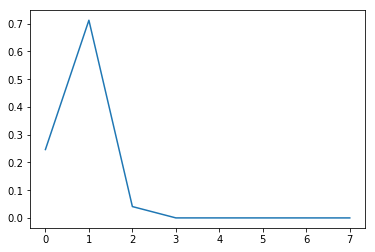

In [6]:
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt

h = sorted(eco_hits.values())
hmean = np.mean(h)
hstd = np.std(h)
pdf = stats.norm.pdf(h, hmean, hstd)
plt.plot(h, pdf)
plt.show()

### Essenciality information of all graph nodes

In [7]:
eco_hits = {k:v for k,v in eco_hits.items() if v != 0}
essentials = eco_data[eco_data['Class'] == 1]
for k in eco_hits:
    if isinstance(k, str) and k in list(essentials['Orf']):
        eco_hits[k] = (eco_hits[k], 1)
    else:
        eco_hits[k] = (eco_hits[k], 2)
len({k for k in eco_hits if eco_hits[k][1] == 1}) / len(eco_hits)

0.13001083423618634

### Exporting gathered data

In [13]:
f = open('NetData.dat', 'w')
f.write("Feature/Product" + "\t" + "Frequency on Database" + "\t" + "Class(1:essential 2:noessential)" + "\n")
for k in eco_hits:
    f.write(str(k) + "\t" + str(eco_hits[k][0]) + "\t" + str(eco_hits[k][1]) + "\n")
f.close()